In [2]:
#import utils
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['figure.figsize'] = [4.5, 3.5]

%matplotlib inline
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

In [3]:
# https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

bank = pd.read_csv("../datasets/bank_marketing/bank-full.csv", delimiter=";")
# bank = pd.read_csv("bank-full.csv", delimiter = ";")
# print first 10 examples
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bank.shape

(45211, 17)

## Violin

### Pros
1. Compared to box plots, it shows more comprehensive view of the data's distribution, the peaks, valleys and tails makes viewer to detect the similarity between groups.
2. To detect unusual clusters of data points by validating the shape and spread of curves, distinct groups can be detected simply.

### Cons

1. **_Different Skewness, Symmetry between groups not distinguishable:_** Violin plot does not show a good result when there are differences between groups symmetry and skewness and shape. It is not easy to extract accurate information from the plot. For instance in the right plot, we can not detect the number of married, single or divorced. so we need to use violin plots in a combination with other plot such as bar plots or box plots.

<Axes: ylabel='marital'>

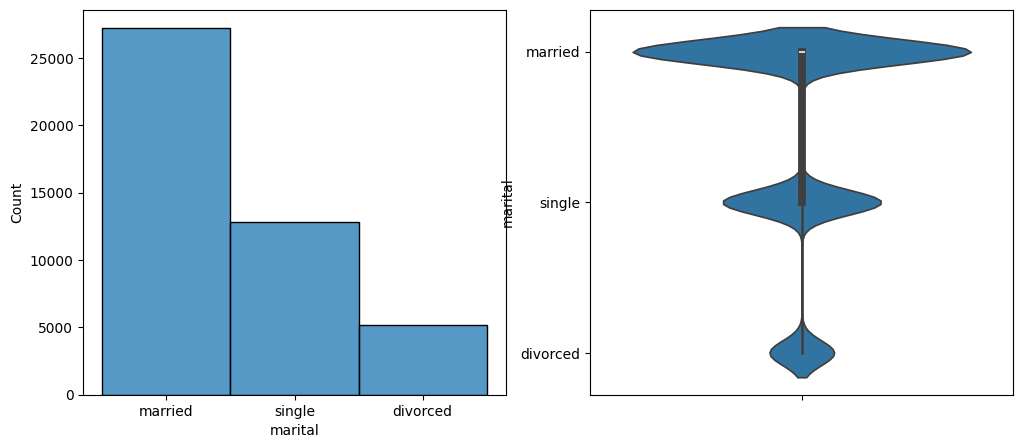

In [12]:
data = bank.duration
f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
sns.histplot(bank.marital, ax=axarr[0])
sns.violinplot(bank.marital, inner="box",ax=axarr[1])

2. **_Low accuracy with small data points:_** Where there is not enough points to be fed into the violin plots, the accuracy of the violin plot drops for the small categories. In the Right side with small data, the plot is so misleading and we can not inspire any meaningful conclusion of it.

Text(0.5, 1.0, 'Small data')

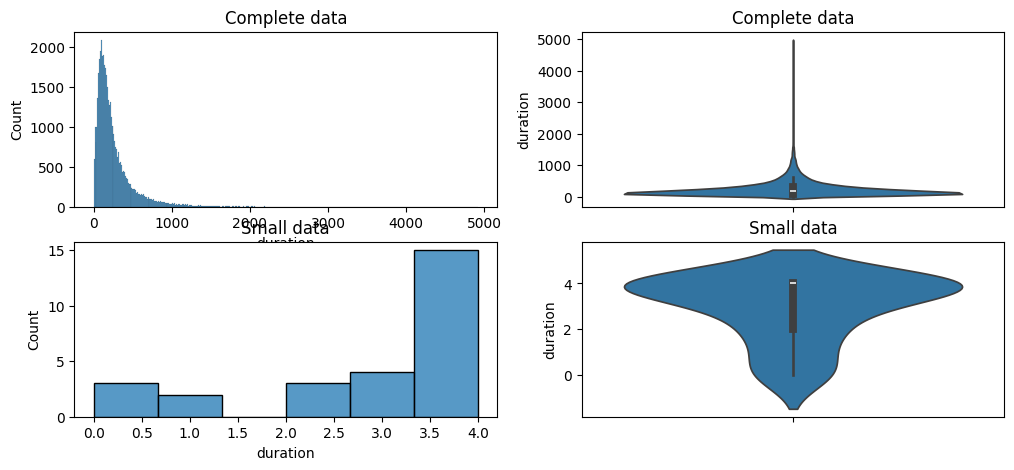

In [22]:
f, axarr = plt.subplots(2,2)

f.set_size_inches(12,5)
sns.histplot(bank.duration, ax=axarr[0,0])
axarr[0,0].set_title("Complete data")
sns.violinplot(bank.duration, inner="box",ax=axarr[0,1])
axarr[0,1].set_title("Complete data")
sns.histplot(bank.duration[bank.duration<5], ax=axarr[1,0])
axarr[1,0].set_title("Small data")
sns.violinplot(bank.duration[bank.duration<5], inner="box",ax=axarr[1,1])
axarr[1,1].set_title("Small data")